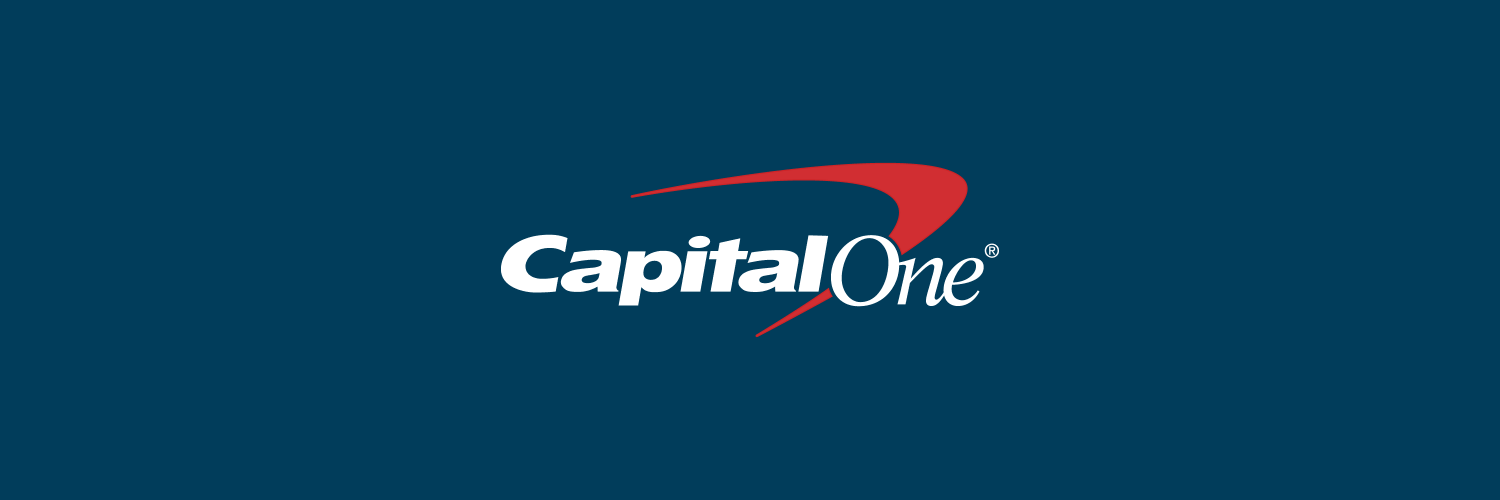



-----------------------

## 1. Part 1: Data Cleaning

### Getting & loading the data


#### Instructions on running the code

***Imp***: This Notebook is divided into multiple part, Part A only requires the raw data to be used, the next parts are going to use the data saved from the prior parts.

- ***Step 1***: Download the zip file from the GitHub reporsitory: https://github.com/CapitalOneRecruiting/DS
- ***Step 2***: Extract the file, a text file with name 'transactions.txt' appears in the extracted folder
- ***Step 3***: Make sure this ipynb(Python Notebook) is in the same folder as the 'transactions.txt' file.
- ***Step 4***: Please proceed by running each cell, the code will create new CSV files which are used in later part of coding

In [1]:
import pandas as pd
import numpy as np

df = pd.read_json('transactions.txt', lines=True)
df.replace('', np.nan, inplace=True)

### Question 1.1: Loading the data

In [2]:
pd.set_option('display.max_columns', None)
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


### Question 1.2: Shape of data

In [4]:
#Creating a new dataframe df1, to manipulate the attributes and not disturbing the original data set

df1 = df.copy()


# Understanding the data file,


print('The shape of transactions data:', df1.shape)
print('Number of columns/attributes in the data:', len(df1.columns))
print('Number of rows in the data:', len(df1))

The shape of transactions data: (786363, 29)
Number of columns/attributes in the data: 29
Number of rows in the data: 786363


In [12]:
# Finding the percentage of fraud transactions:

df1['isFraud'].value_counts()

print('% of Frauds in Total dataset:',round(100*len(df1[df1['isFraud'] == True])/len(df1),2))


% of Frauds in Total dataset: 1.58


In [14]:
#To understand the timeframe of the data, transaction date time stamp is converted to datetime format
df1['transactionDateTime'] = pd.to_datetime(df1['transactionDateTime'])

In [17]:
print('Start timestamp in dataset of transactions',df1['transactionDateTime'].min())
print('End timestamp in dataset of transactions',df1['transactionDateTime'].max())

Start timestamp in dataset of transactions 2016-01-01 00:01:02
End timestamp in dataset of transactions 2016-12-30 23:59:45


[Text(0, 0, '773946'), Text(0, 0, '12417')]

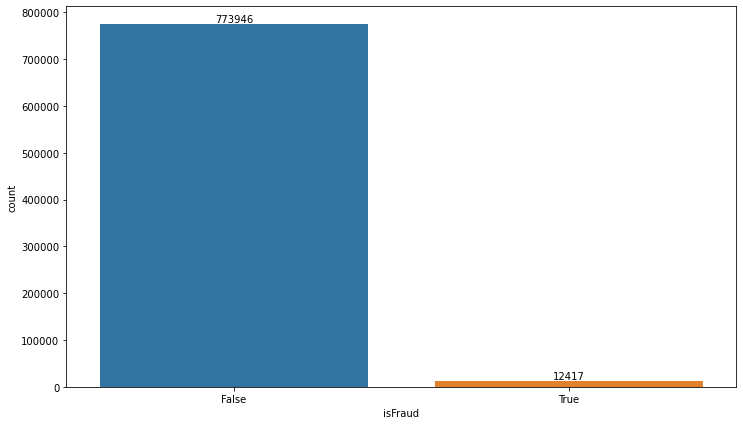

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize = (12,7))
ax = sns.countplot(x=df1['isFraud'],
                   order=df1['isFraud'].value_counts(ascending=False).index);

abs_values = df[df1['isFraud']].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

#Source Code: https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot/49052124

In [35]:
print('Total Transactions value:',round(df1['transactionAmount'].sum(),2))
print('Total Transactions value of frauds',round(df1[df1['isFraud']==True]['transactionAmount'].sum(),2))
print('Total Transactions value of nonfrauds',round(df1[df1['isFraud']==False]['transactionAmount'].sum(),2))

Total Transactions value: 107720557.53
Total Transactions value of frauds 2796505.89
Total Transactions value of nonfrauds 104924051.64


In [39]:
print('Average Transactions value of frauds',round(df1[df1['isFraud']==True]['transactionAmount'].sum(),2)/len(df1[df1['isFraud']==True]))
print('Average Transactions value of nonfrauds',round(df1[df1['isFraud']==False]['transactionAmount'].sum(),2)/len(df1[df1['isFraud']==False]))

Average Transactions value of frauds 225.21590480792463
Average Transactions value of nonfrauds 135.57024862199688


In [94]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [95]:
df1.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

In [96]:
df1

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


In [97]:
# Finding the unique value counts

for i in df1.columns:
    if df1[i].dtypes =='O':
        print('The value counts of',i,'is:'"\n")
        print(df1[i].value_counts(),"\n")


The value counts of transactionDateTime is:

2016-12-25T14:04:15    4
2016-05-28T14:24:41    4
2016-06-02T11:27:00    3
2016-04-24T22:44:16    3
2016-04-14T13:11:10    3
                      ..
2016-09-11T13:32:42    1
2016-09-11T13:35:34    1
2016-09-11T13:38:27    1
2016-09-11T13:57:50    1
2016-12-30T20:10:29    1
Name: transactionDateTime, Length: 776637, dtype: int64 

The value counts of merchantName is:

Uber                             25613
Lyft                             25523
oldnavy.com                      16992
staples.com                      16980
alibaba.com                      16959
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
Curves #849125                       1
EZ Wireless #149871                  1
TMobile Wireless #602341             1
Name: merchantName, Length: 2490, dtype: int64 

The value counts of acqCountry is:

US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCount

In [98]:
df1.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


### Question 1.3: Summary statistics

In [9]:

#We are removing the columns which has practically no values from the df1 dataset
#Those are: echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd

df1.drop(columns = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
        , inplace=True, axis=1)

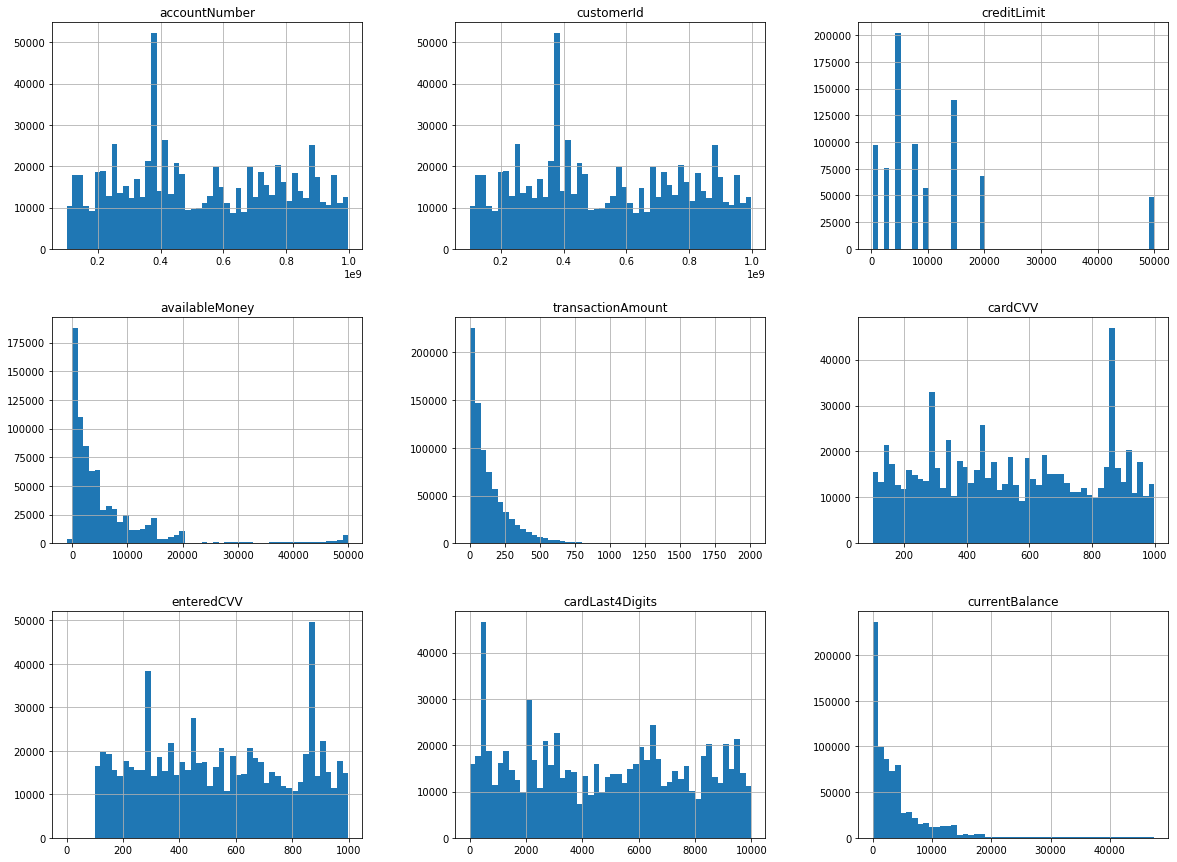

In [10]:

%matplotlib inline

import matplotlib.pyplot as plt

df1.hist(bins = 50, figsize = (20,15))
plt.show()

In [11]:
# Saving the data file until here into a new CSV

df1.to_csv('transactions_cleaned.csv')



***We are able to get the summary of statistics of the data set. Few highlights of the summary stats:***

**Whole dataset:**

-	Total Records: 786,363
-	Total Columns: 29
-	Types of various data types in data set are: Integers (int64), Floats (float64), Object (object), Boolean(bool)
-	Null value columns, i.e all 786363 values in these columns are null : echoBuffer, merchantCity, merchantState, merchantZip, posOnPremises, recurringAuthInd

**Null Values:**

-	acqCountry                    4562
-	merchantCountryCode            724
-	posEntryMode                  4054
-	posConditionCode               409
-	transactionType                698

*Moving forward, as the null values here represent a fraction of our dataset, we will be dropping these rows of null values.* 

**Attribute wise:**

*Transaction Amount:*

-	Varies with Min of 0 USD to Max of 2011.54 USD
-	Mean transaction amount : 136.9 USD
-	Standard Deviation : 147.9

*Credit Limit:*

-	Varies with Min of 250 USD to Max of 50,000 USD
-	Mean credit limit of users : 10759 USD
-	Standard Deviation : 11636 USD

*Available Money:*
-	Varies with Min of -1005.63 USD to Max of 50,000 USD
-	Mean Available limit for users : 6250 USD
-	Standard Deviation : 8880 USD

*Transaction Type:*
-	Unique Value counts of 
-	PURCHASE                745193
-	REVERSAL                 20303
-	ADDRESS_VERIFICATION     20169


## Part 2: Data Exploration & Questions from mail

In [12]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('transactions_cleaned.csv')

In [13]:
df1 = df1.drop('Unnamed: 0', axis = 1)
df1

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [14]:
df1.transactionType.value_counts()

PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64

False    22103
True       122
Name: isFraud, dtype: int64


/Users/aneeshraj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

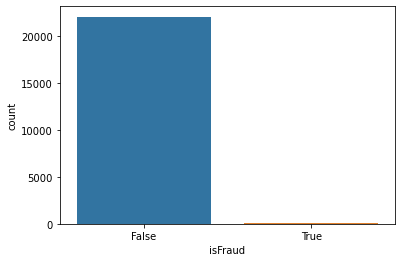

In [15]:
import seaborn as sns

transactions_zero = df1[df1['transactionAmount'] ==0]

transactions_zero

print(transactions_zero.isFraud.value_counts())
sns.countplot(transactions_zero['isFraud'])


#### Interesting Finding:

*How can a dataset has rows which had zero transaction amount and yet it was fraud?*

Let's Explore more!

In [16]:
transactions_zero[transactions_zero['isFraud'] == True].cardPresent.value_counts()

False    122
Name: cardPresent, dtype: int64

We can see that for a zero transaction amount which were fraud transactions, where card is absent, all were frauds. This concludes that presence of card is an important factor for our analysis going down!

Card Present data:
False    433495
True     352868
Name: cardPresent, dtype: int64


Fraud value counts:
False    773946
True      12417
Name: isFraud, dtype: int64


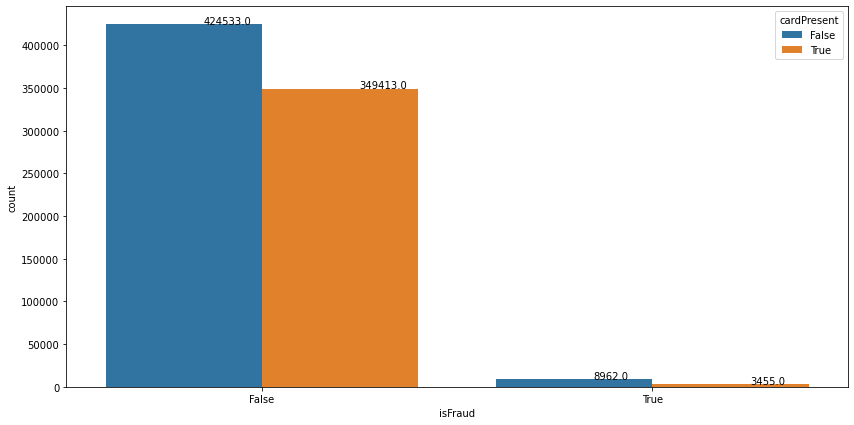

In [17]:
import matplotlib.pyplot as plt

#Understanding the factor of Card presence Vs frauds
print('Card Present data:')
print(df1['cardPresent'].value_counts())
print('\n')
print('Fraud value counts:')
print(df1['isFraud'].value_counts())


plt.figure(figsize=(14,7))
ax = sns.countplot(hue = df1['cardPresent'], x = df1['isFraud'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#### Interesting finding
- in the transactions where it was fraud, Card presence seems like an important weigh with **70%** of fraud transactions happening where card is absent compared to **54%** in the non fraud transactions.
- this makes Card presence an imp attribute while building our model.

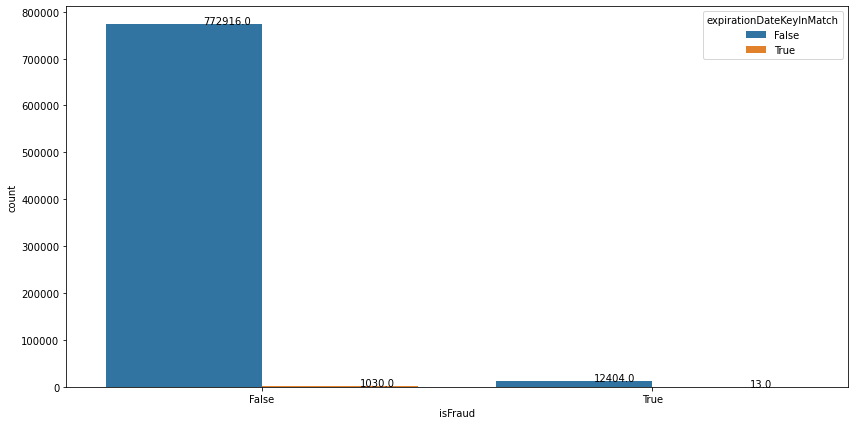

In [18]:
#Understanding the factor of expiration key date correctness  Vs frauds

plt.figure(figsize=(14,7))
ax = sns.countplot(hue = df1['expirationDateKeyInMatch'], x = df1['isFraud'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#### Interesting finding
- This shows that almost every fraud transaction had false expiration date entered,this also seems to be an important data column that can help us build better model.

-----
- ***Update:*** Adding the card presence data didnt add much to the precision of the model.Hence, in the view of using minimal computational power, I chose not to include these in the final submitted model.

#### Finding obsersavations

In [19]:
df_frauds = df1[df1['isFraud'] == True]
df_frauds


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
694,984504651,984504651,50000,8613.80,2016-09-08T16:14:40,165.26,Walgreens #860120,US,US,9.0,8.0,health,10/2021,2015-07-27,2016-06-25,640,640,8332,PURCHASE,41386.20,False,False,True
971,114896048,114896048,15000,14113.96,2016-01-06T08:05:06,298.85,sears.com,US,US,9.0,1.0,online_retail,09/2028,2015-12-19,2015-12-19,773,773,8915,PURCHASE,886.04,False,False,True
1072,114896048,114896048,15000,13702.47,2016-03-07T02:40:54,406.89,Planet Fitness #136615,US,US,9.0,1.0,health,05/2028,2015-12-19,2015-12-19,773,773,8915,PURCHASE,1297.53,False,False,True
1113,114896048,114896048,15000,8943.58,2016-04-09T15:14:04,439.31,oldnavy.com,US,US,9.0,1.0,online_retail,05/2032,2015-12-19,2015-12-19,773,773,8915,PURCHASE,6056.42,False,False,True
1321,114896048,114896048,15000,5223.03,2016-08-24T01:24:35,266.09,sears.com,US,US,9.0,1.0,online_retail,05/2028,2015-12-19,2016-06-10,773,773,8915,PURCHASE,9776.97,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785680,207667444,207667444,7500,5517.88,2016-02-16T06:14:11,385.41,staples.com,US,US,90.0,1.0,online_retail,10/2021,2011-12-12,2011-12-12,235,235,9853,PURCHASE,1982.12,False,False,True
785713,207667444,207667444,7500,764.48,2016-06-14T12:03:12,393.43,Pizza Hut #288835,US,US,9.0,8.0,fastfood,10/2027,2011-12-12,2011-12-12,235,235,9853,PURCHASE,6735.52,True,False,True
785888,428856030,428856030,250,61.94,2016-08-25T15:55:11,370.43,discount.com,US,US,9.0,1.0,online_retail,08/2025,2009-08-17,2009-08-17,990,990,7660,PURCHASE,188.06,False,False,True
786054,657364505,657364505,20000,20000.00,2016-08-21T14:41:30,28.09,Next Day Online Services,US,US,9.0,8.0,online_gifts,03/2029,2014-10-31,2014-10-31,138,138,6163,PURCHASE,0.00,False,False,True


##### Finding the Accountnumber which has highest fraud transactions?

380680241    783
782081187    307
246251253    278
Name: accountNumber, dtype: int64


Text(0, 0.5, 'Account Number')

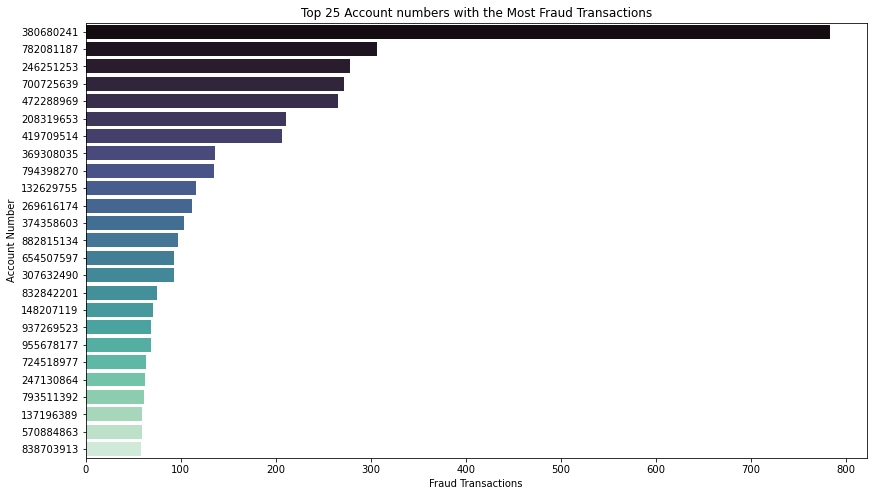

In [20]:


account_top25 = df_frauds['accountNumber'].value_counts().head(25)

print(account_top25.head(3))
plt.figure(figsize=(14,8))

sns.color_palette("mako", as_cmap=True)
sns.barplot(y=list(range(25)), x=account_top25.values, orient='h',palette = 'mako')
plt.title('Top 25 Account numbers with the Most Fraud Transactions')
plt.xlabel('Fraud Transactions')
plt.yticks(ticks=list(range(25)), labels=account_top25.index.tolist())
plt.ylabel('Account Number')

#### Interesting finding:

Account numbers: ***380680241, 782081187, 246251253*** are having top three most transactions with ***783, 307 & 278*** fraud transactions respectively

In [21]:
# The account number 380680241, seems interesting lets create a new data set and explore those transactions

df_frauds_380680241 = df_frauds[df_frauds['accountNumber'] == 380680241]
df_380680241 = df1[df1['accountNumber'] == 380680241]

print('The percentage of frauds for account number - 380680241 is: ', round(len(df_frauds_380680241)*100/len(df_380680241),2),'%')

The percentage of frauds for account number - 380680241 is:  2.38 %


In [22]:
#Lets see the most spends of 380680241 account and frauds at which merchant is happening for the account.

#==========================================
print('Top 3 merchants with which 380680241 had recorded transactions:')
print(df_380680241['merchantName'].value_counts().head(3))

#==========================================

print('=====================================')
print('Top 3 merchants with which 380680241 had recorded fraudlent transactions:')
print(df_frauds_380680241['merchantName'].value_counts().head(3))


Top 3 merchants with which 380680241 had recorded transactions:
Next Day eCards          4094
Fresh eCards             4065
Fresh Online Services    4042
Name: merchantName, dtype: int64
Top 3 merchants with which 380680241 had recorded fraudlent transactions:
Fresh Flowers                    462
Blue Mountain Online Services    132
Blue Mountain eCards              53
Name: merchantName, dtype: int64


#### Interesting finding:

The account number ***380680241*** had most fraud transactions with merchantName - ***'Fresh Flowers'***.

##### Finding the merchant name which has highest fraud transactions?

Lyft             760
ebay.com         639
Fresh Flowers    553
Name: merchantName, dtype: int64


Text(0, 0.5, 'Merchant Name')

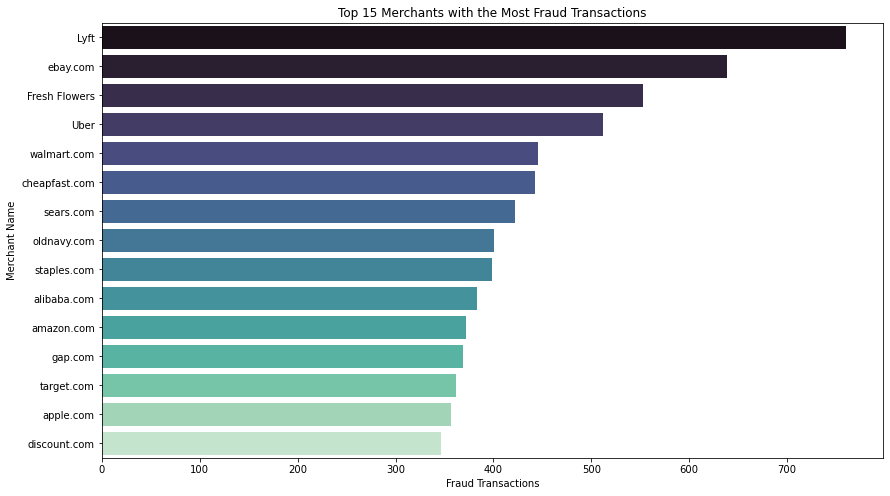

In [23]:


merchant_top15 = df_frauds['merchantName'].value_counts().head(15)

print(merchant_top15.head(3))

plt.figure(figsize=(14,8))

sns.color_palette("mako", as_cmap=True)
sns.barplot(y=list(range(15)), x=merchant_top15.values, orient='h',palette = 'mako')
plt.title('Top 15 Merchants with the Most Fraud Transactions')
plt.xlabel('Fraud Transactions')
plt.yticks(ticks=list(range(15)), labels=merchant_top15.index.tolist())
plt.ylabel('Merchant Name')

#### Interesting finding!

- Lyft, ebay & Fresh Flowers are the merchants that have significant number of fraud transactions. We can build alert systems for this pattern of purchases

In [24]:
print(df1['transactionDateTime'].max())
print(df1['transactionDateTime'].min())

2016-12-30T23:59:45
2016-01-01T00:01:02


In [29]:
acc_nos_frauds = df_frauds['accountNumber']

In [118]:
#creating df_nonfrauds dataframe to understand the RFM of legit transactions
df_nonfrauds = df1[df1['isFraud'] == False]

#=========================================
difference_fraud_nonfraud_percent = []

for i in acc_nos_frauds:
    f = df_frauds[df_frauds['accountNumber'] == i].transactionAmount.mean()
    nf = df_nonfrauds[df_nonfrauds['accountNumber'] == i].transactionAmount.mean()
    difference_fraud_nonfraud_percent.append((f-nf)*100/(f+1)) #Added 1 so that denominator will not have '0'

difference_fraud_nonfraud_percent = pd.Series(difference_fraud_nonfraud_percent)
difference_fraud_nonfraud_percent

0         10.522187
1         48.195135
2         48.195135
3         48.195135
4         48.195135
            ...    
12412     68.727664
12413     68.727664
12414     66.376309
12415   -174.015732
12416     14.761653
Length: 12417, dtype: float64

In [119]:
difference_fraud_nonfraud_percent.describe()

count    12414.000000
mean        21.326809
std        244.193438
min     -15955.785714
25%         15.125057
50%         37.783687
75%         45.822539
max         97.731574
dtype: float64

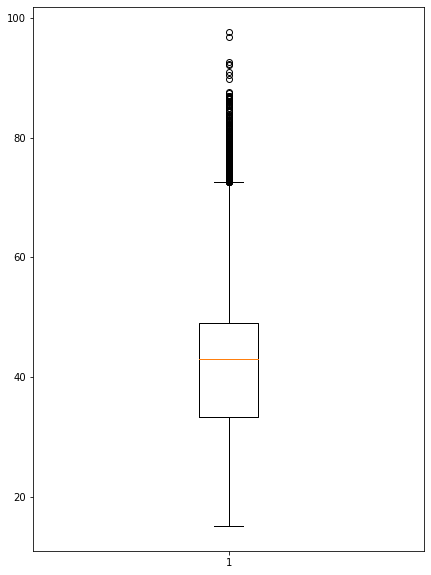

In [121]:
difference_fraud_nonfraud_percent = difference_fraud_nonfraud_percent[difference_fraud_nonfraud_percent>15]

plt.figure(figsize=(7,10))
plt.boxplot(difference_fraud_nonfraud_percent)
plt.show()

#### Interesting Finding:

- if the transactions are **> 15.125%** *(25th percentile)* of the historical average spent by the customer through our card, that it is **75%** probability that transaction might be fradulent
- We can create an alert system based on customer usage of credit card history


### Question 2.1: Transaction amount - Histogram

count    786363.000000
mean        136.985791
std         147.725569
min           0.000000
25%          33.650000
50%          87.900000
75%         191.480000
max        2011.540000
Name: transactionAmount, dtype: float64


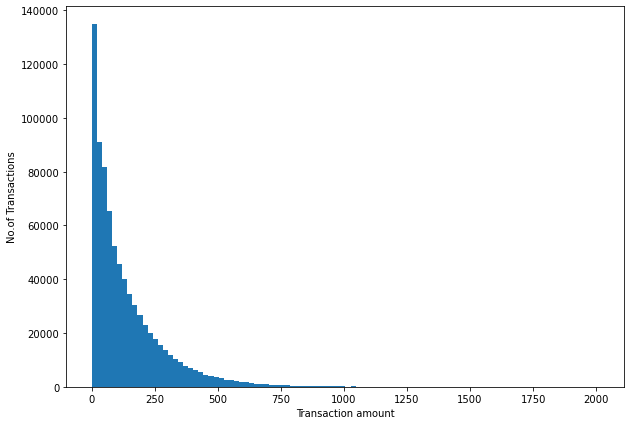

In [33]:
print(df1['transactionAmount'].describe())

plt.figure(figsize=(10,7))
plt.xlabel('Transaction amount')
plt.ylabel('No.of Transactions')

plt.hist(x = df1['transactionAmount'], bins = 100)[0]
plt.show()


### Question 2.2: Understanding the transactionAmount Histogram:

- The transaction amounts are following *tail-heavy* pattern, this may make it a bit harder for our Machine Learning model to detect patterns. This column needs transformations into a more bell-shaped curve patterns and this is following an *exponential pattern*.
- The plot is plotted with bins = ***100***. In this we can understand that transactions peak from *0-100 usd* with more that **50%** transactions are under **100 USD** & **>75%** transactions are **< 200USD**

-----------

### Question 3 : Reversal & Multiswipe transactions

In [34]:
## Reversal Transactions:

reversed_transactions_dataframe= df1[df1['transactionType'] == 'REVERSAL']
print('The total number of reversed transactions are:',len(reversed_transactions_dataframe))

print('Total value in USD, that was reversed during the transactions',reversed_transactions_dataframe['transactionAmount'].sum(), 'USD')

The total number of reversed transactions are: 20303
Total value in USD, that was reversed during the transactions 2821792.5 USD


**Hypothesis to find the reversal data:**
-	The transactions which are reversal are pretty much straightforward and are given in transactionType column
-	Creating a new dataframe with just reversal transactions and finding the length of the dataframe gives total number of reversal transactions
-	The sum of transaction amount in that data frame should be giving us the total amount reversed.

-------

Therefore, we found that finally there are around **20303 transactions** which were reversed and their total value is **282k USD**

In [35]:
## Multiswipe Transactions

#---------------
## Changing the data type from object to Date Time
df1['transactionDateTime'] = pd.to_datetime(df1['transactionDateTime'], infer_datetime_format=True)

#Source: https://stackoverflow.com/questions/56517004/mark-duplicates-based-on-time-difference-between-successive-rows
#Assumptions: Group the transactions by Customer Id, Transaction Amount & Merchant Name ; 
# within the timeframe of 5 Mins


df1['Duplicated?'] = (df1.sort_values(['transactionDateTime']).groupby(['customerId', 'transactionAmount', 'merchantName'],
                    sort=False)['transactionDateTime'].diff().dt.total_seconds().lt(300))

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  int64         
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                781801 non-null  object        
 8   merchantCountryCode       785639 non-null  object        
 9   posEntryMode              782309 non-null  float64       
 10  posConditionCode          785954 non-null  float64       
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [37]:
multiswipe_transactions_dataframe = df1[df1['Duplicated?'] == True]
multiswipe_transactions_dataframe


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,Duplicated?
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,9.0,1.0,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,299.02,True,False,False,True
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,5.0,1.0,health,08/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,3632.59,False,False,False,True
200,984504651,984504651,50000,36452.49,2016-02-12 05:10:49,34.92,Golds Gym #747443,US,US,9.0,1.0,health,03/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,13547.51,False,False,False,True
263,984504651,984504651,50000,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,2.0,1.0,entertainment,10/2024,2015-07-27,2015-07-27,640,640,8332,PURCHASE,23319.01,True,False,False,True
264,984504651,984504651,50000,26562.47,2016-03-12 06:36:41,118.52,AMC #706324,US,US,2.0,1.0,entertainment,10/2024,2015-07-27,2015-07-27,640,640,8332,PURCHASE,23437.53,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785983,205026043,205026043,5000,451.59,2016-06-07 22:29:11,391.94,Uber,US,US,9.0,8.0,rideshare,12/2029,2008-04-15,2008-04-15,198,198,3931,PURCHASE,4548.41,False,False,False,True
785984,205026043,205026043,5000,433.52,2016-06-07 22:30:57,391.94,Uber,US,US,9.0,8.0,rideshare,12/2029,2008-04-15,2008-04-15,198,198,3931,PURCHASE,4566.48,False,False,False,True
786014,205026043,205026043,5000,1571.26,2016-09-18 06:08:02,56.26,Lyft,US,US,5.0,1.0,rideshare,07/2031,2008-04-15,2008-04-15,359,359,258,REVERSAL,3428.74,False,False,False,True
786120,638498773,638498773,10000,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,5.0,1.0,fastfood,11/2032,2014-11-17,2014-11-17,175,175,321,REVERSAL,201.79,True,False,False,True


In [38]:
print(multiswipe_transactions_dataframe.transactionType.value_counts())
print('% of reversals during multiswipe transactions:', round((5723*100)/13403,2),'%')

PURCHASE                7449
REVERSAL                5723
ADDRESS_VERIFICATION     223
Name: transactionType, dtype: int64
% of reversals during multiswipe transactions: 42.7 %


In [39]:
print('The number of Multiswipe Transactions are:', len(multiswipe_transactions_dataframe))
print('The value of transactions done during Multiswipe Transactions are:', multiswipe_transactions_dataframe['transactionAmount'].sum(), 'USD')

The number of Multiswipe Transactions are: 13403
The value of transactions done during Multiswipe Transactions are: 1933949.11 USD


In [40]:
#=================================
multiswipe_transactions_dataframe_frauds = multiswipe_transactions_dataframe[multiswipe_transactions_dataframe['isFraud']==True]
print(multiswipe_transactions_dataframe_frauds.transactionType.value_counts())

PURCHASE                129
REVERSAL                104
ADDRESS_VERIFICATION      2
Name: transactionType, dtype: int64



**Hypothesis to find the Multiswipe data:**
-	The transactions which are multiswiped are selected by creating a new column that says whether the transaction is duplicated or not
-	For this first change transaction time stamp data to Datetime data type
-	Then  assuming that multiswipe are those transactions that happen for same purchase with same merchant and same transaction amount within 5Mins as timeframe, I created the duplicated column using groupby command on dataframe.
-	Also checked for the count if original swipe is also included, they aren’t.


--------
It is important to notice that in the Multiswipe transactions data frame we did, repetitions of original transactions were left and next set of transactions that happened in ***5min*** bracket were recorded.

Therefore, we found that finally there are around **13403 transactions** which were multi-swiped and their total value is **193k USD**

### Question 3.3 - Interesting Finding:

- If we look in depth, 42.7% of Multiswipe transactions are Reversed transactions
- In the whole dataset, 129 transactions were fraudulent and were multiswiped

In [41]:
#To understand the interesting thing about these transactions:

reversal_percentage_value = (reversed_transactions_dataframe['transactionAmount'].sum())*100/(df1['transactionAmount'].sum())
print('Percentage of value of reversal transactions over total transactions', round(reversal_percentage_value,3),'%')

#---------------------------

multiswipe_percentage_value = (multiswipe_transactions_dataframe['transactionAmount'].sum())*100/(df1['transactionAmount'].sum())
print('Percentage of value of multiswiped transactions over total transactions', round(multiswipe_percentage_value,3),'%')



Percentage of value of reversal transactions over total transactions 2.62 %
Percentage of value of multiswiped transactions over total transactions 1.795 %


## Part 3: Data Preparation for modelling

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df2 = pd.read_csv('transactions_cleaned.csv')
df2 = df2.drop('Unnamed: 0', axis = 1)

In [43]:
df2

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [44]:
# Columns like 'accountNumber','customerId', 'accountOpenDate', 'dateOfLastAddressChange','cardLast4Digits'
# Have no importance in business point of view for the modelling, 
# hence lets go ahead with dropping these columns

df2.drop(columns = ['accountNumber','customerId', 'accountOpenDate', 'dateOfLastAddressChange',
                    'cardLast4Digits'],axis = 1, inplace = True)

In [45]:
df2

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,414,414,PURCHASE,0.00,False,False,False
1,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,486,486,PURCHASE,0.00,True,False,False
2,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,486,486,PURCHASE,0.00,False,False,False
3,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,486,486,PURCHASE,0.00,False,False,False
4,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,885,885,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,936,936,PURCHASE,1095.04,False,False,False
786359,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,939,939,PURCHASE,1214.96,False,False,False
786360,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,936,936,PURCHASE,1233.85,False,False,False
786361,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,939,939,PURCHASE,1283.28,False,False,False


In [46]:
df2['CVV_Correct'] = np.where(df2['cardCVV']==df2['enteredCVV'], 1, 0)
#If cvv is correct then value = 1

In [47]:
df2

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,CVV_Correct
0,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,414,414,PURCHASE,0.00,False,False,False,1
1,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,486,486,PURCHASE,0.00,True,False,False,1
2,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,486,486,PURCHASE,0.00,False,False,False,1
3,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,486,486,PURCHASE,0.00,False,False,False,1
4,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,885,885,PURCHASE,0.00,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,936,936,PURCHASE,1095.04,False,False,False,1
786359,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,939,939,PURCHASE,1214.96,False,False,False,1
786360,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,936,936,PURCHASE,1233.85,False,False,False,1
786361,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,939,939,PURCHASE,1283.28,False,False,False,1


In [48]:
df2.shape

(786363, 19)

False    773946
True      12417
Name: isFraud, dtype: int64


/Users/aneeshraj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

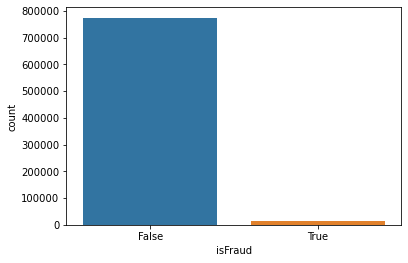

In [49]:
#Preparing the dataset for modelling!

print(df2['isFraud'].value_counts())

import seaborn as sns
sns.countplot(df2['isFraud'])

# We have data imbalance which has 98.4% of data which isnt fraud, hence we will try to create a new data frame,
# where we have balanced data set of Fraud and non Fraud transactions

In [50]:
# Lets drop the NA values from Data frame and create new seperate datasets X & y for the modelling.

df3 = df2.dropna()



In [51]:
df3.describe()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,currentBalance,CVV_Correct
count,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000
mean,10756.182822,6247.583238,136.975808,9.051610,3.269411,544.517081,544.229697,4508.599584,0.991077
std,11631.241047,8873.694052,147.697222,16.777834,9.792300,261.531955,261.561830,6457.248679,0.094038
min,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000
25%,5000.000000,1077.520000,33.650000,2.000000,1.000000,310.000000,310.000000,689.985000,1.000000
50%,7500.000000,3184.285000,87.890000,5.000000,1.000000,535.000000,535.000000,2451.715000,1.000000
75%,15000.000000,7500.000000,191.500000,9.000000,1.000000,785.000000,785.000000,5289.120000,1.000000
max,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,47498.810000,1.000000


#### Standard scaling and Skewness correction:
- Few columns have right skewed data, we will work on those features to make sure we get a more bell shaped curve
- Also there is a huge difference between the columns scales, we will make them relatively better scaled ones using technique called 'standard scaler'

In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 776668 entries, 0 to 786362
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               776668 non-null  int64  
 1   availableMoney            776668 non-null  float64
 2   transactionDateTime       776668 non-null  object 
 3   transactionAmount         776668 non-null  float64
 4   merchantName              776668 non-null  object 
 5   acqCountry                776668 non-null  object 
 6   merchantCountryCode       776668 non-null  object 
 7   posEntryMode              776668 non-null  float64
 8   posConditionCode          776668 non-null  float64
 9   merchantCategoryCode      776668 non-null  object 
 10  currentExpDate            776668 non-null  object 
 11  cardCVV                   776668 non-null  int64  
 12  enteredCVV                776668 non-null  int64  
 13  transactionType           776668 non-null  o

In [53]:
df3['log_availableMoney'] = np.log(df3['availableMoney'])

# Important: I will be adding '1' to the data set of few columns following so that 
# there are not gonna be -inf values for the post log column

df3['log_transactionAmount'] = np.log(df3['transactionAmount']+1)
df3['log_creditLimit'] = np.log(df3['creditLimit']+1)

/Users/aneeshraj/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/76/hcgsy2q54_14cttdrbhvxlqc0000gn/T/ipykernel_10703/3757638678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['log_availableMoney'] = np.log(df3['availableMoney'])
/var/folders/76/hcgsy2q54_14cttdrbhvxlqc0000gn/T/ipykernel_10703/3757638678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['lo

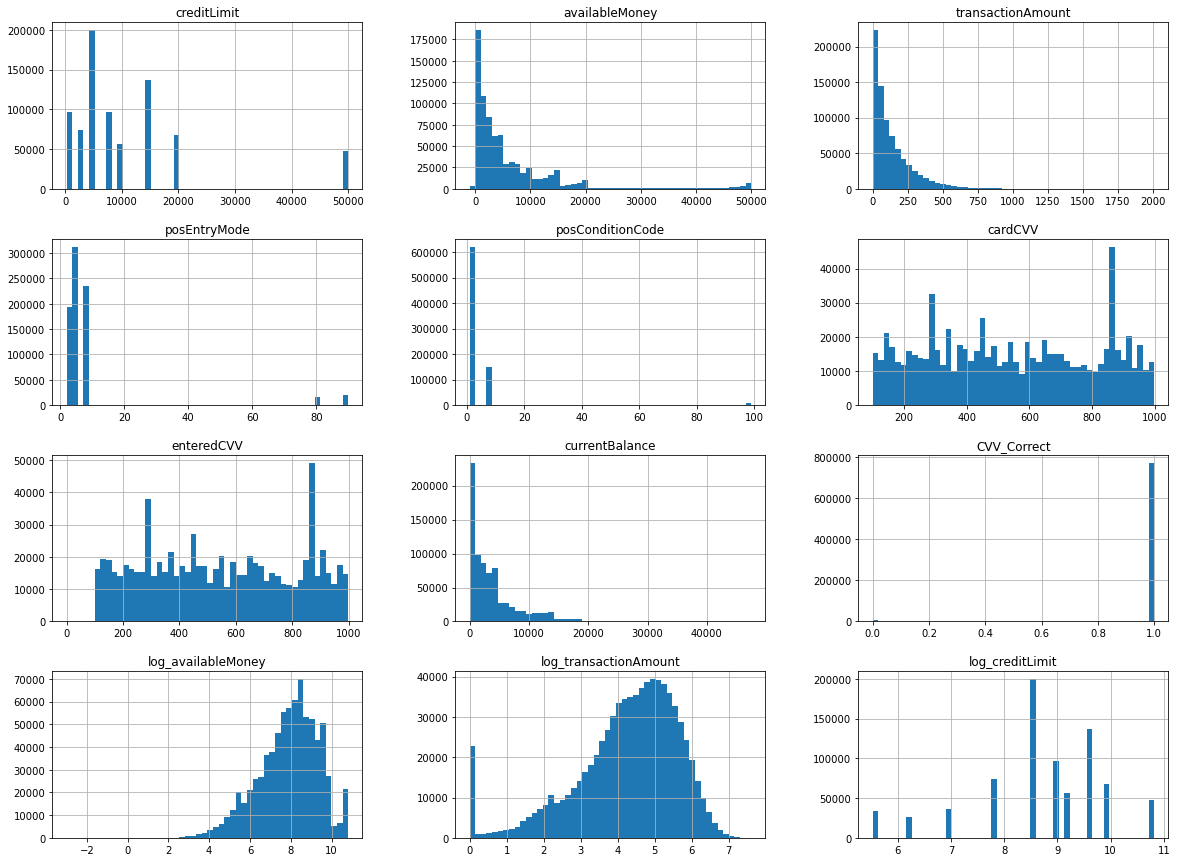

In [54]:
%matplotlib inline

import matplotlib.pyplot as plt

df3.hist(bins = 50, figsize = (20,15))
plt.show()

- AHHH!! A better bell curves, for the skewed data, though these are a bit left skewed they are much better than previously.

In [55]:
df3.describe()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,currentBalance,CVV_Correct,log_availableMoney,log_transactionAmount,log_creditLimit
count,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,776668.000000,773772.000000,776668.000000,776668.000000
mean,10756.182822,6247.583238,136.975808,9.051610,3.269411,544.517081,544.229697,4508.599584,0.991077,7.900578,4.244770,8.726562
std,11631.241047,8873.694052,147.697222,16.777834,9.792300,261.531955,261.561830,6457.248679,0.094038,1.458804,1.416027,1.207045
min,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000,-2.995732,0.000000,5.525453
25%,5000.000000,1077.520000,33.650000,2.000000,1.000000,310.000000,310.000000,689.985000,1.000000,6.999933,3.545298,8.517393
50%,7500.000000,3184.285000,87.890000,5.000000,1.000000,535.000000,535.000000,2451.715000,1.000000,8.073244,4.487400,8.922792
75%,15000.000000,7500.000000,191.500000,9.000000,1.000000,785.000000,785.000000,5289.120000,1.000000,8.922658,5.260096,9.615872
max,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,47498.810000,1.000000,10.819778,7.607153,10.819798


<AxesSubplot:>

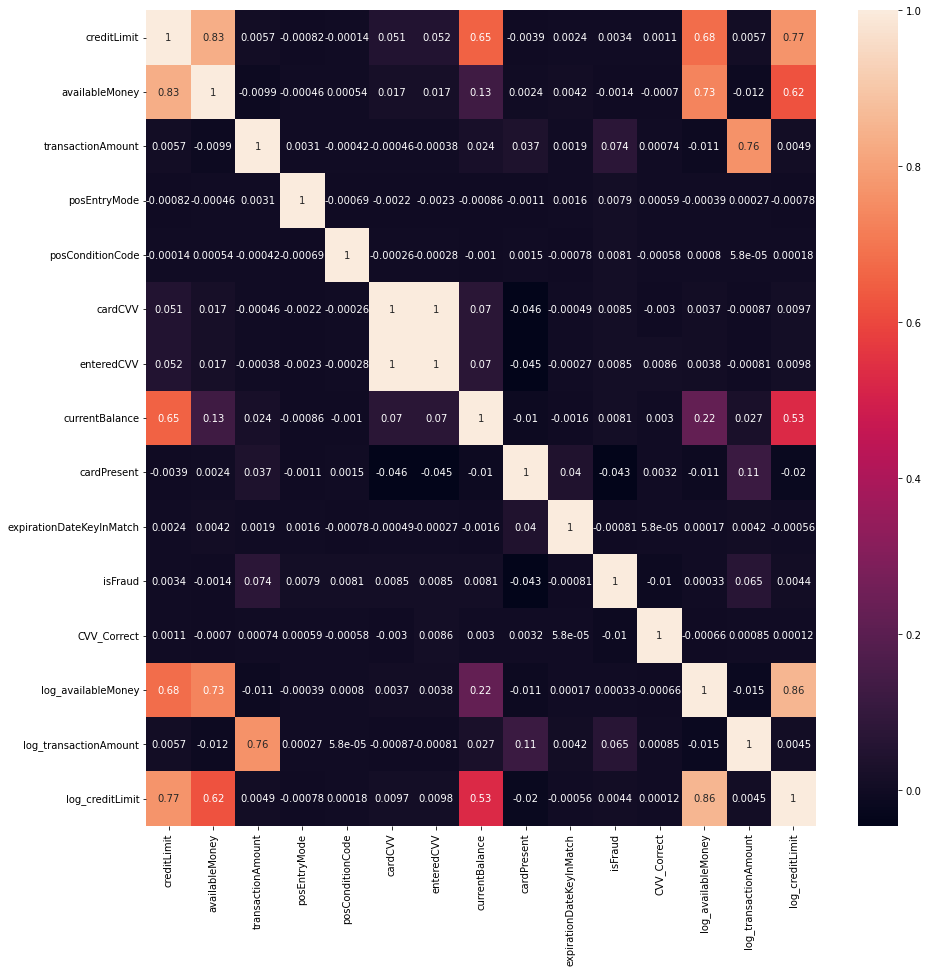

In [56]:


corr = df3.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot = True)

In [57]:
df3

,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,cardCVV,enteredCVV,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,CVV_Correct,log_availableMoney,log_transactionAmount,log_creditLimit
0,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,1.0,rideshare,06/2023,414,414,PURCHASE,0.00,False,False,False,1,8.517193,4.600660,8.517393
1,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,1.0,entertainment,02/2024,486,486,PURCHASE,0.00,True,False,False,1,8.517193,4.324265,8.517393
2,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,486,486,PURCHASE,0.00,False,False,False,1,8.517193,2.136531,8.517393
3,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,1.0,mobileapps,08/2025,486,486,PURCHASE,0.00,False,False,False,1,8.517193,2.136531,8.517393
4,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,1.0,fastfood,10/2029,885,885,PURCHASE,0.00,True,False,False,1,8.517193,4.279163,8.517393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90.0,1.0,rideshare,12/2022,936,936,PURCHASE,1095.04,False,False,False,1,10.797634,4.795129,10.819798
786359,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,9.0,1.0,online_subscriptions,08/2023,939,939,PURCHASE,1214.96,False,False,False,1,10.795179,2.990217,10.819798
786360,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,2.0,1.0,rideshare,08/2025,936,936,PURCHASE,1233.85,False,False,False,1,10.794792,3.920586,10.819798
786361,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,9.0,99.0,online_retail,07/2022,939,939,PURCHASE,1283.28,False,False,False,1,10.793778,3.929666,10.819798


#### Choosing the attributes for the model:
- Transaction Time stamp seemed irrelevant
- credit limit
- current balance isnt important hence removed

In [58]:


df3 = df3[['log_creditLimit','log_availableMoney','log_transactionAmount','posEntryMode','posConditionCode','merchantCategoryCode',
           'transactionType','CVV_Correct','isFraud']]
df3.describe()

,log_creditLimit,log_availableMoney,log_transactionAmount,posEntryMode,posConditionCode,CVV_Correct
count,776668.000000,773772.000000,776668.000000,776668.000000,776668.000000,776668.000000
mean,8.726562,7.900578,4.244770,9.051610,3.269411,0.991077
std,1.207045,1.458804,1.416027,16.777834,9.792300,0.094038
min,5.525453,-2.995732,0.000000,2.000000,1.000000,0.000000
25%,8.517393,6.999933,3.545298,2.000000,1.000000,1.000000
50%,8.922792,8.073244,4.487400,5.000000,1.000000,1.000000
75%,9.615872,8.922658,5.260096,9.000000,1.000000,1.000000
max,10.819798,10.819778,7.607153,90.000000,99.000000,1.000000


In [59]:
df3

,log_creditLimit,log_availableMoney,log_transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,CVV_Correct,isFraud
0,8.517393,8.517193,4.600660,2.0,1.0,rideshare,PURCHASE,1,False
1,8.517393,8.517193,4.324265,9.0,1.0,entertainment,PURCHASE,1,False
2,8.517393,8.517193,2.136531,9.0,1.0,mobileapps,PURCHASE,1,False
3,8.517393,8.517193,2.136531,9.0,1.0,mobileapps,PURCHASE,1,False
4,8.517393,8.517193,4.279163,2.0,1.0,fastfood,PURCHASE,1,False
...,...,...,...,...,...,...,...,...,...
786358,10.819798,10.797634,4.795129,90.0,1.0,rideshare,PURCHASE,1,False
786359,10.819798,10.795179,2.990217,9.0,1.0,online_subscriptions,PURCHASE,1,False
786360,10.819798,10.794792,3.920586,2.0,1.0,rideshare,PURCHASE,1,False
786361,10.819798,10.793778,3.929666,9.0,99.0,online_retail,PURCHASE,1,False


<AxesSubplot:>

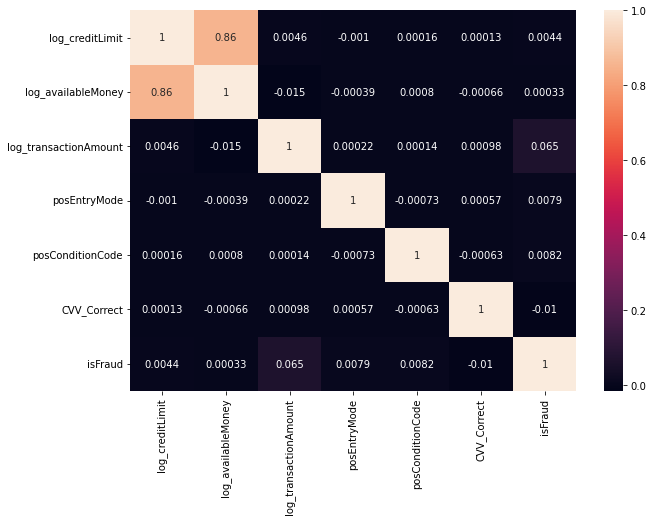

In [100]:

corr = df3.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True)

In [61]:
df3.to_csv('transactions_for_modelling.csv')

## Part 4: Modelling of the data

In [77]:
#loading the new data set into the model notebook


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df3 = pd.read_csv('transactions_for_modelling.csv')

df3 = df3.drop('Unnamed: 0', axis = 1)

df3 = df3.dropna()

df3

,log_creditLimit,log_availableMoney,log_transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,CVV_Correct,isFraud
0,8.517393,8.517193,4.600660,2.0,1.0,rideshare,PURCHASE,1,False
1,8.517393,8.517193,4.324265,9.0,1.0,entertainment,PURCHASE,1,False
2,8.517393,8.517193,2.136531,9.0,1.0,mobileapps,PURCHASE,1,False
3,8.517393,8.517193,2.136531,9.0,1.0,mobileapps,PURCHASE,1,False
4,8.517393,8.517193,4.279163,2.0,1.0,fastfood,PURCHASE,1,False
...,...,...,...,...,...,...,...,...,...
776663,10.819798,10.797634,4.795129,90.0,1.0,rideshare,PURCHASE,1,False
776664,10.819798,10.795179,2.990217,9.0,1.0,online_subscriptions,PURCHASE,1,False
776665,10.819798,10.794792,3.920586,2.0,1.0,rideshare,PURCHASE,1,False
776666,10.819798,10.793778,3.929666,9.0,99.0,online_retail,PURCHASE,1,False


<AxesSubplot:>

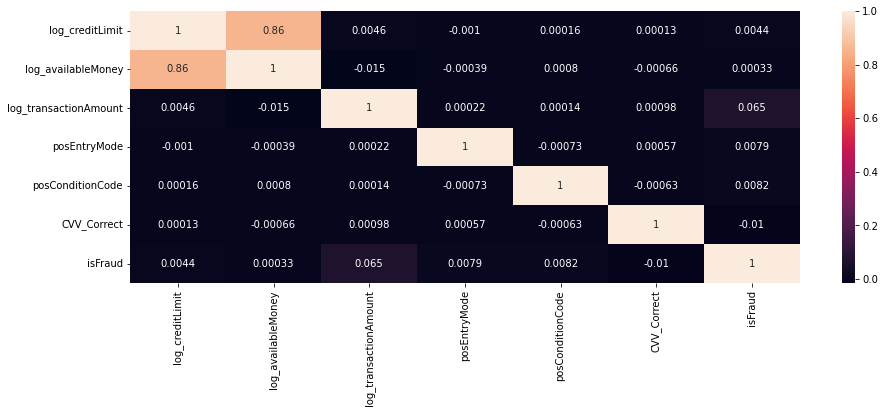

In [78]:
corr = df3.corr()
import seaborn as sns

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot = True)

In [79]:
X = df3.drop('isFraud', axis = 1)
y = df3['isFraud']

X

,log_creditLimit,log_availableMoney,log_transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,CVV_Correct
0,8.517393,8.517193,4.600660,2.0,1.0,rideshare,PURCHASE,1
1,8.517393,8.517193,4.324265,9.0,1.0,entertainment,PURCHASE,1
2,8.517393,8.517193,2.136531,9.0,1.0,mobileapps,PURCHASE,1
3,8.517393,8.517193,2.136531,9.0,1.0,mobileapps,PURCHASE,1
4,8.517393,8.517193,4.279163,2.0,1.0,fastfood,PURCHASE,1
...,...,...,...,...,...,...,...,...
776663,10.819798,10.797634,4.795129,90.0,1.0,rideshare,PURCHASE,1
776664,10.819798,10.795179,2.990217,9.0,1.0,online_subscriptions,PURCHASE,1
776665,10.819798,10.794792,3.920586,2.0,1.0,rideshare,PURCHASE,1
776666,10.819798,10.793778,3.929666,9.0,99.0,online_retail,PURCHASE,1


In [80]:
X.describe()

,log_creditLimit,log_availableMoney,log_transactionAmount,posEntryMode,posConditionCode,CVV_Correct
count,773772.000000,773772.000000,773772.000000,773772.000000,773772.000000,773772.000000
mean,8.737174,7.900578,4.244742,9.053363,3.269528,0.991077
std,1.196172,1.458804,1.415952,16.781172,9.791521,0.094037
min,5.525453,-2.995732,0.000000,2.000000,1.000000,0.000000
25%,8.517393,6.999933,3.545298,2.000000,1.000000,1.000000
50%,8.922792,8.073244,4.487287,5.000000,1.000000,1.000000
75%,9.615872,8.922658,5.259992,9.000000,1.000000,1.000000
max,10.819798,10.819778,7.607153,90.000000,99.000000,1.000000


#### Undersampling the data

- Undersampling the data after splitting the train & test data sets
    - We are going to undersample the data using the ***RandomUnderSampler*** Technique and create imbalanced data
    - Then build the model using the imbalanced data and balanced data and evaluate the models.

In [81]:
# Balancing the data
from imblearn.under_sampling import RandomUnderSampler

# Setting Parameters
rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_sample(X, y)

False    11922
True     11922
Name: isFraud, dtype: int64


/Users/aneeshraj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


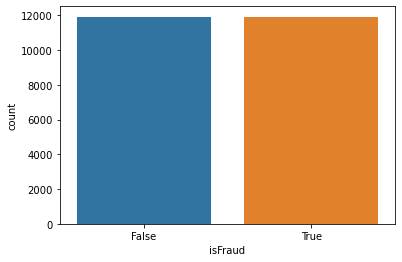

In [82]:
import seaborn as sns

# Check class balancing
print(pd.Series(y_rus).value_counts())
# Plot the new Class distribution
sns.countplot(y_rus);

------------
- Our RUS has created a new dataset with 11966 equal values of data set lets get on to build the model and view the results on this balanced data

In [83]:
#We will do one hot encoding on the variables which are categorical

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')



In [84]:
# passing pos entry mode column
ohe_df_1 = pd.DataFrame(ohe.fit_transform(X_rus[['posEntryMode']]).toarray())
# merge with main X with ohe_df on key values
ohe_df_1.columns = ohe.get_feature_names(['posEntryMode'])

X_rus = X_rus.join(ohe_df_1)

X_rus

,log_creditLimit,log_availableMoney,log_transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,CVV_Correct,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0
0,8.517393,8.347744,2.280339,2.0,1.0,online_subscriptions,PURCHASE,1,1.0,0.0,0.0,0.0,0.0
1,7.824446,7.712099,5.406499,9.0,1.0,online_gifts,PURCHASE,1,0.0,0.0,1.0,0.0,0.0
2,10.819798,10.547878,3.487375,5.0,1.0,fastfood,PURCHASE,1,0.0,1.0,0.0,0.0,0.0
3,8.517393,8.021315,4.826873,5.0,1.0,food,PURCHASE,1,0.0,1.0,0.0,0.0,0.0
4,6.908755,4.360037,4.311872,5.0,1.0,food,PURCHASE,1,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23839,8.922792,8.615749,5.956899,90.0,1.0,online_retail,PURCHASE,1,0.0,0.0,0.0,0.0,1.0
23840,8.922792,6.639196,5.977442,9.0,8.0,fastfood,PURCHASE,1,0.0,0.0,1.0,0.0,0.0
23841,5.525453,4.126166,5.917360,9.0,1.0,online_retail,PURCHASE,1,0.0,0.0,1.0,0.0,0.0
23842,9.903538,9.903488,3.370394,9.0,8.0,online_gifts,PURCHASE,1,0.0,0.0,1.0,0.0,0.0


In [85]:
# passing pos condition mode column
ohe_df_2 = pd.DataFrame(ohe.fit_transform(X_rus[['posConditionCode']]).toarray())
# merge with main X with modified ohe_df on key values
ohe_df_2.columns = ohe.get_feature_names(['posConditionCode'])

X_rus = X_rus.join(ohe_df_2)

In [86]:
# passing pos condition mode column
ohe_df_3 = pd.DataFrame(ohe.fit_transform(X_rus[['transactionType']]).toarray())
# merge with main X with modified ohe_df on key values
ohe_df_3.columns = ohe.get_feature_names(['transactionType'])

X_rus = X_rus.join(ohe_df_3)

In [87]:
X_rus

,log_creditLimit,log_availableMoney,log_transactionAmount,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,CVV_Correct,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,8.517393,8.347744,2.280339,2.0,1.0,online_subscriptions,PURCHASE,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.824446,7.712099,5.406499,9.0,1.0,online_gifts,PURCHASE,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,10.819798,10.547878,3.487375,5.0,1.0,fastfood,PURCHASE,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8.517393,8.021315,4.826873,5.0,1.0,food,PURCHASE,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6.908755,4.360037,4.311872,5.0,1.0,food,PURCHASE,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23839,8.922792,8.615749,5.956899,90.0,1.0,online_retail,PURCHASE,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
23840,8.922792,6.639196,5.977442,9.0,8.0,fastfood,PURCHASE,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23841,5.525453,4.126166,5.917360,9.0,1.0,online_retail,PURCHASE,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
23842,9.903538,9.903488,3.370394,9.0,8.0,online_gifts,PURCHASE,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
del X_rus['posEntryMode']
del X_rus['posConditionCode']
del X_rus['transactionType']
X_rus

,log_creditLimit,log_availableMoney,log_transactionAmount,merchantCategoryCode,CVV_Correct,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
0,8.517393,8.347744,2.280339,online_subscriptions,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,7.824446,7.712099,5.406499,online_gifts,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,10.819798,10.547878,3.487375,fastfood,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,8.517393,8.021315,4.826873,food,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,6.908755,4.360037,4.311872,food,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23839,8.922792,8.615749,5.956899,online_retail,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
23840,8.922792,6.639196,5.977442,fastfood,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
23841,5.525453,4.126166,5.917360,online_retail,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
23842,9.903538,9.903488,3.370394,online_gifts,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [89]:
X_rus.describe()

,log_creditLimit,log_availableMoney,log_transactionAmount,CVV_Correct,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL
count,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000
mean,8.754567,7.898605,4.607148,0.987083,0.264637,0.305276,0.382989,0.019418,0.027680,0.814377,0.171406,0.014217,0.017908,0.955838,0.026254
std,1.180616,1.447965,1.340610,0.112920,0.441149,0.460534,0.486126,0.137991,0.164058,0.388810,0.376871,0.118389,0.132620,0.205459,0.159893
min,5.525453,1.785070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.517393,6.993261,3.971753,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,8.922792,8.056542,4.866264,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,9.615872,8.924990,5.547129,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10.819798,10.819778,7.383586,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
# We still have merchantCategoryCode in Object data type, 
# lets implement Label Encoder for that columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X_rus['merchantCategoryCode_Labels'] = le.fit_transform(X_rus['merchantCategoryCode'])


In [91]:
del X_rus['merchantCategoryCode']


X_rus

,log_creditLimit,log_availableMoney,log_transactionAmount,CVV_Correct,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_Labels
0,8.517393,8.347744,2.280339,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,15
1,7.824446,7.712099,5.406499,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,13
2,10.819798,10.547878,3.487375,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
3,8.517393,8.021315,4.826873,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5
4,6.908755,4.360037,4.311872,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23839,8.922792,8.615749,5.956899,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,14
23840,8.922792,6.639196,5.977442,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4
23841,5.525453,4.126166,5.917360,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,14
23842,9.903538,9.903488,3.370394,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13


In [92]:
X_rus.describe()

,log_creditLimit,log_availableMoney,log_transactionAmount,CVV_Correct,posEntryMode_2.0,posEntryMode_5.0,posEntryMode_9.0,posEntryMode_80.0,posEntryMode_90.0,posConditionCode_1.0,posConditionCode_8.0,posConditionCode_99.0,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_Labels
count,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000,23844.000000
mean,8.754567,7.898605,4.607148,0.987083,0.264637,0.305276,0.382989,0.019418,0.027680,0.814377,0.171406,0.014217,0.017908,0.955838,0.026254,10.196611
std,1.180616,1.447965,1.340610,0.112920,0.441149,0.460534,0.486126,0.137991,0.164058,0.388810,0.376871,0.118389,0.132620,0.205459,0.159893,5.345765
min,5.525453,1.785070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.517393,6.993261,3.971753,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000
50%,8.922792,8.056542,4.866264,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000
75%,9.615872,8.924990,5.547129,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,14.000000
max,10.819798,10.819778,7.383586,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000


In [93]:
from sklearn.model_selection import train_test_split

# Split the dataset between training and testing
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, stratify=y_rus, shuffle=True)

In [105]:
# Using Logistic Regression on the data!

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0).fit(X_rus_train, y_rus_train)
print('Logistic Regression accuracy (train)=',LR.score(X_rus_train, y_rus_train))
print('Logistic Regression accuracy (test)=',LR.score(X_rus_test, y_rus_test))

Logistic Regression accuracy (train)= 0.6664989095789297
Logistic Regression accuracy (test)= 0.6708605938600906


/Users/aneeshraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
y_rus_test_pred=LR.predict(X_rus_test)
y_rus_test_pred

array([ True, False, False, ...,  True, False,  True])

Accuracy: 0.6708605938600906


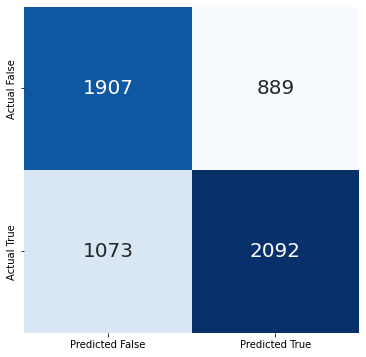

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve 


plt.subplots(figsize=(6,6))
conf = confusion_matrix(y_rus_test_pred, y_rus_test)
acc = accuracy_score(y_rus_test_pred, y_rus_test)
print(f'Accuracy: {acc}')
sns.heatmap(conf,cmap='Blues',cbar=False,annot=True,fmt='g',xticklabels=['Predicted False', 'Predicted True'],yticklabels=['Actual False','Actual True'],annot_kws={"size": 20})
plt.show()

In [108]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(random_state=0).fit(X_rus_train, y_rus_train)
print('Decision Tree Classifier accuracy (train)=',DTC.score(X_rus_train, y_rus_train))
print('Decision Tree Classifier (test)=',DTC.score(X_rus_test, y_rus_test))

Decision Tree Classifier accuracy (train)= 1.0
Decision Tree Classifier (test)= 0.607112900520047


Accuracy: 0.607112900520047


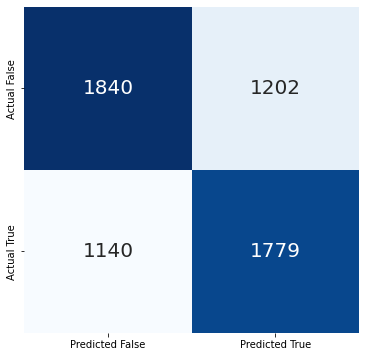

In [109]:
y_rus_test_pred=DTC.predict(X_rus_test)

plt.subplots(figsize=(6,6))
conf = confusion_matrix(y_rus_test_pred, y_rus_test)
acc = accuracy_score(y_rus_test_pred, y_rus_test)
print(f'Accuracy: {acc}')
sns.heatmap(conf,cmap='Blues',cbar=False,annot=True,fmt='g',xticklabels=['Predicted False', 'Predicted True'],yticklabels=['Actual False','Actual True'],annot_kws={"size": 20})

plt.show()

In [110]:
from xgboost import XGBClassifier

XGB = XGBClassifier().fit(X_rus_train, y_rus_train)
print('XG Boost accuracy (train)=',XGB.score(X_rus_train, y_rus_train))
print('XG Boost Classifier (test)=',XGB.score(X_rus_test, y_rus_test))

/Users/aneeshraj/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost accuracy (train)= 0.7950567578146843
XG Boost Classifier (test)= 0.6993792987753733


Accuracy: 0.6993792987753733


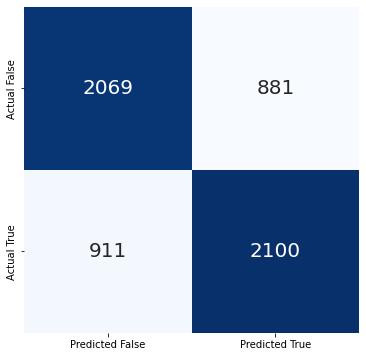

In [111]:
y_rus_test_pred=XGB.predict(X_rus_test)

plt.subplots(figsize=(6,6))
conf = confusion_matrix(y_rus_test_pred, y_rus_test, labels=XGB.classes_)
acc = accuracy_score(y_rus_test_pred, y_rus_test)
print(f'Accuracy: {acc}')
sns.heatmap(conf,cmap='Blues',cbar=False,annot=True,fmt='g',xticklabels=['Predicted False', 'Predicted True'],yticklabels=['Actual False','Actual True'],annot_kws={"size": 20})
plt.show()

In [112]:
from sklearn.ensemble import RandomForestClassifier
accuracy = np.zeros((10,10))
for i in range(0,5):
    for j in range(0,10):
        RFC = RandomForestClassifier(max_depth=i+1, random_state=j)
        RFC.fit(X_rus_train, y_rus_train)
        accuracy[i,j] = RFC.score(X_rus_train, y_rus_train)+RFC.score(X_rus_test, y_rus_test)

  Confusion Matrix of Random Forest Classifier Test Set
Accuracy: 0.6790806911592014


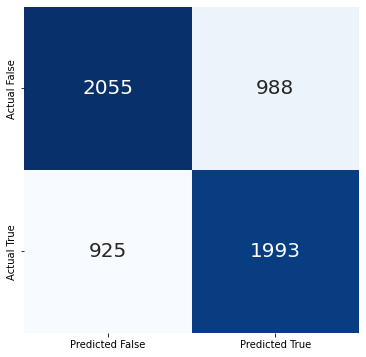

In [113]:

print("  Confusion Matrix of Random Forest Classifier Test Set")
y_rus_test_pred=RFC.predict(X_rus_test)

plt.subplots(figsize=(6,6))
conf = confusion_matrix(y_rus_test_pred, y_rus_test)
acc = accuracy_score(y_rus_test_pred, y_rus_test)
print(f'Accuracy: {acc}')
sns.heatmap(conf,cmap='Blues',cbar=False,annot=True,fmt='g',xticklabels=['Predicted False', 'Predicted True'],yticklabels=['Actual False','Actual True'],annot_kws={"size": 20})
plt.show()

In [114]:
from sklearn import metrics

def plot_roc(actuals, predicted_dict):

    plt.figure(figsize=(15,7))
    plt.title('ROC')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    for key, predicted in predicted_dict.items():
        fpr, tpr, threshold = metrics.roc_curve(actuals, predicted)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = '%25s AUC = %0.3f' % (key, roc_auc))
    plt.legend(loc = 'lower right')
    plt.show()

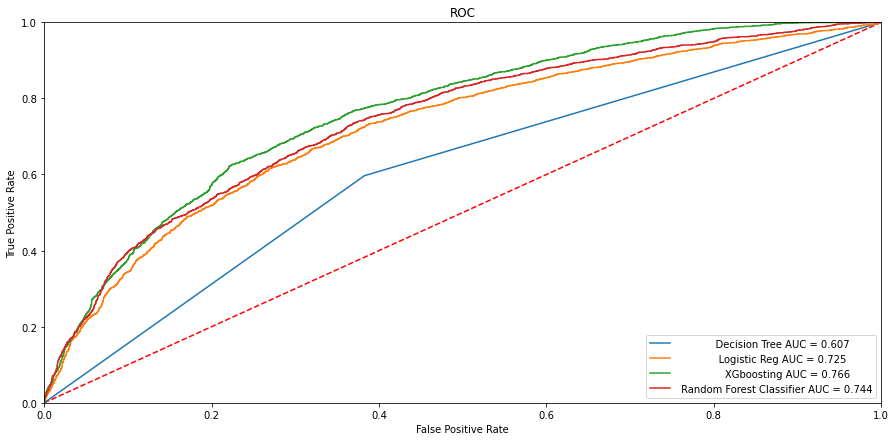

In [115]:
LR_p = LR.predict_proba(X_rus_test)[:,1]
XGB_p = XGB.predict_proba(X_rus_test)[:,1]
DTC_p=DTC.predict_proba(X_rus_test)[:,1]
RFC_p = RFC.predict_proba(X_rus_test)[:,1]

plot_roc(y_rus_test, {'Decision Tree': DTC_p,"Logistic Reg": LR_p, 'XGboosting':XGB_p, 'Random Forest Classifier':RFC_p,
                     })

------------
#### Test Data Accuracies:

Decision Tree Classifier : **0.60**
Logistic Regression : **0.67**
Random Forest Classifier : **0.68**
XGBoost Classifier : **0.70**

Based upon the Accuracy scores the choice of models for the Fraud prediction is as follows:

XGBoost >= Random Forest >= Logistic Regression > Decision Tree.

But, as discussed initially, XGBoost has the lowest False Positive numbers, **13%** better than Random Forest False Positive numbers. Using a model with less False Positive is cost-effective.

The model accuracies can be improved with feature engineering and tuning the hyperparameters in future


Also we can use *F1 score, rms error* as a metric to evaluate.